## Feature Engineering

In [1]:
import pandas as pd
import numpy as np

import sqlite3
from sqlite3 import Error

import matplotlib.pyplot as plt
import seaborn as sns

from src.modules.feature_engineering import scale_encoder, num_null_replacement, print_null_features
from src.modules.load_source_data import load_data_set, load_agg_data

In [2]:
# get X and y (target variable)
# Load data
X, y = load_data_set('data/Training','flights_all_fields_1M_rows.csv')

# Save y
y.to_csv('data/Training/combined_datasets/target.csv', index=False)
print(X.shape)
print(y.shape)

(1092525, 27)
(1092525,)


In [3]:
pd.set_option("display.max_columns", None)
X.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour
0,2018-09-28,WN,WN,WN,6253,WN,N8553W,6253,14122,PIT,"Pittsburgh, PA",13204,MCO,"Orlando, FL",1610,1825,N,135.0,1,834,2018,9,28,5,39,16,18
1,2018-09-28,WN,WN,WN,6279,WN,N444WN,6279,14321,PWM,"Portland, ME",10821,BWI,"Baltimore, MD",535,710,N,95.0,1,452,2018,9,28,5,39,5,7
2,2018-09-28,WN,WN,WN,1798,WN,N7839A,1798,14492,RDU,"Raleigh/Durham, NC",10693,BNA,"Nashville, TN",620,650,N,90.0,1,442,2018,9,28,5,39,6,6
3,2018-09-28,WN,WN,WN,1058,WN,N457WN,1058,14492,RDU,"Raleigh/Durham, NC",11292,DEN,"Denver, CO",1940,2120,N,220.0,1,1436,2018,9,28,5,39,19,21
4,2018-09-28,WN,WN,WN,5745,WN,N916WN,5745,14570,RNO,"Reno, NV",12889,LAS,"Las Vegas, NV",2135,2245,N,70.0,1,345,2018,9,28,5,39,21,22


In [4]:
# drop features
train = X.copy()
#to_drop = ['mkt_carrier', 'tail_num', 'origin_city_name', 'dest_city_name', 'dup', 'fl_date', 'branded_code_share', 'op_unique_carrier', 'origin', 'dest', 'flights']
to_drop = ['fl_date', 'dup', 'flights']
train = train.drop(to_drop, axis=1)

In [5]:
train.shape

(1092525, 24)

In [6]:
#load features - Passengers, fuel_comsumption
train = load_agg_data(train, path='data/Training')

In [7]:
train.shape

(1092525, 60)

In [8]:
train.head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_seats,month_flight_passengers,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers
0,WN,WN,WN,6253,WN,N8553W,6253,14122,PIT,"Pittsburgh, PA",13204,MCO,"Orlando, FL",1610,1825,135.0,834,2018,9,28,5,39,16,18,-4.856410,109.010256,32.157895,0.000000,0.631579,0.0,52.473684,5.028351,112.404639,14.441176,1.338235,12.985294,0.000000,39.750000,9.794393,113.028037,22.666667,0.000000,12.095238,0.000000,38.000000,16476,40367,70172.0,59846.0,156.688446,133.358861,78901284,62539560,153.984737,121.514593,157453740.2,4650071,3550404,17690901,14467289
1,WN,WN,WN,6279,WN,N444WN,6279,14321,PWM,"Portland, ME",10821,BWI,"Baltimore, MD",535,710,95.0,452,2018,9,28,5,39,5,7,-0.725322,71.884120,59.761905,3.714286,5.238095,0.0,18.428571,1.393855,74.631285,37.285714,2.020408,7.959184,0.000000,21.040816,-2.178354,74.153963,54.754717,0.000000,16.113208,0.320755,6.358491,5773,34338,83000.0,72552.0,155.089744,138.365690,78901284,62539560,153.984737,121.514593,157453740.2,1154895,962404,12809026,10253075
2,WN,WN,WN,1798,WN,N7839A,1798,14492,RDU,"Raleigh/Durham, NC",10693,BNA,"Nashville, TN",620,650,90.0,442,2018,9,28,5,39,6,6,-4.048485,67.618182,2.230769,0.000000,12.923077,0.0,14.769231,1.981250,71.656250,9.960784,2.705882,4.196078,0.313725,30.764706,-5.719780,72.972527,23.000000,0.000000,13.666667,0.000000,0.000000,22739,26928,60873.0,49575.0,155.076923,115.956185,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,7613155,6149937
3,WN,WN,WN,1058,WN,N457WN,1058,14492,RDU,"Raleigh/Durham, NC",11292,DEN,"Denver, CO",1940,2120,220.0,1436,2018,9,28,5,39,19,21,-2.648148,195.500000,6.857143,2.428571,12.928571,0.0,19.214286,2.058824,204.663102,6.975610,1.365854,14.121951,0.000000,21.634146,8.785978,203.837638,8.296296,2.246914,11.530864,0.000000,27.580247,22739,94040,40737.0,36525.0,159.000000,139.984087,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,29507455,25361777
4,WN,WN,WN,5745,WN,N916WN,5745,14570,RNO,"Reno, NV",12889,LAS,"Las Vegas, NV",2135,2245,70.0,345,2018,9,28,5,39,21,22,-2.489642,54.472693,12.267857,0.678571,9.767857,0.0,17.642857,4.561924,53.954964,12.050279,1.318436,7.776536,0.128492,27.944134,11.378446,54.583960,5.500000,0.000000,5.277778,0.000000,41.259259,7759,55700,191107.0,153579.0,155.233728,123.361095,78901284,62539560,153.984737,121.514593,157453740.2,2131372,1687478,23377952,19451761


In [9]:
to_drop = ['month_flight_seats', 'month_flight_passengers']
train = train.drop(to_drop, axis=1)

In [10]:
train.to_csv('data/Training/combined_datasets/train_raw.csv', index=False)

In [11]:
sorted(list(train.columns))

['arr_hour_avg_air_time',
 'arr_hour_avg_arr_delay',
 'arr_hour_avg_carrier_delay',
 'arr_hour_avg_late_aircraft_delay',
 'arr_hour_avg_nas_delay',
 'arr_hour_avg_security_delay',
 'arr_hour_avg_weather_delay',
 'branded_code_share',
 'carrier_month_avg_passengers',
 'carrier_month_avg_seats',
 'carrier_month_passengers',
 'carrier_month_seats',
 'crs_arr_hour',
 'crs_arr_time',
 'crs_dep_hour',
 'crs_dep_time',
 'crs_elapsed_time',
 'day',
 'day_of_week',
 'day_of_week_avg_air_time',
 'day_of_week_avg_arr_delay',
 'day_of_week_avg_carrier_delay',
 'day_of_week_avg_late_aircraft_delay',
 'day_of_week_avg_nas_delay',
 'day_of_week_avg_security_delay',
 'day_of_week_avg_weather_delay',
 'dest',
 'dest_airport_id',
 'dest_airport_month_flight_seats',
 'dest_airport_month_passengers',
 'dest_city_name',
 'dest_total_flights',
 'distance',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'mkt_unique_carrier',
 'month',
 'month_avg_air_time',
 'month_avg_arr_delay',
 'month_avg_carrier_delay',
 'mont

## Null value replacement

In [12]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
month_flight_avg_passengers,208979,0.191281
month_flight_avg_seats,208979,0.191281
arr_hour_avg_security_delay,3632,0.003324
arr_hour_avg_carrier_delay,3632,0.003324
arr_hour_avg_weather_delay,3632,0.003324
arr_hour_avg_nas_delay,3632,0.003324
arr_hour_avg_late_aircraft_delay,3632,0.003324
month_avg_nas_delay,2070,0.001895
month_avg_weather_delay,2070,0.001895
month_avg_carrier_delay,2070,0.001895


In [13]:
# Replace by mean
train.fillna({'month_flight_avg_passengers': train['month_flight_avg_passengers'].mean(),
             'month_flight_avg_seats': train['month_flight_avg_seats'].mean()}, inplace=True)

In [14]:
# Remove nulls for numeric values
train_n_null = num_null_replacement(train)

Missing data:
-------------
                                     Total   Percent
arr_hour_avg_security_delay           3632  0.003324
arr_hour_avg_late_aircraft_delay      3632  0.003324
arr_hour_avg_carrier_delay            3632  0.003324
arr_hour_avg_weather_delay            3632  0.003324
arr_hour_avg_nas_delay                3632  0.003324
month_avg_nas_delay                   2070  0.001895
month_avg_weather_delay               2070  0.001895
month_avg_carrier_delay               2070  0.001895
month_avg_security_delay              2070  0.001895
month_avg_late_aircraft_delay         2070  0.001895
day_of_week_avg_late_aircraft_delay    947  0.000867
day_of_week_avg_carrier_delay          947  0.000867
day_of_week_avg_weather_delay          947  0.000867
day_of_week_avg_nas_delay              947  0.000867
day_of_week_avg_security_delay         947  0.000867
arr_hour_avg_air_time                   37  0.000034
day_of_week_avg_air_time                11  0.000010
month_avg_air_time

## Remove some categorical features

In [15]:
train_n_null.dtypes[train_n_null.dtypes == 'object']

mkt_unique_carrier    object
branded_code_share    object
mkt_carrier           object
op_unique_carrier     object
tail_num              object
origin                object
origin_city_name      object
dest                  object
dest_city_name        object
dtype: object

In [16]:
to_drop = ['op_unique_carrier', 'branded_code_share', 'mkt_carrier','origin_city_name', 'dest_city_name']
train_n_null = train_n_null.drop(to_drop, axis=1)

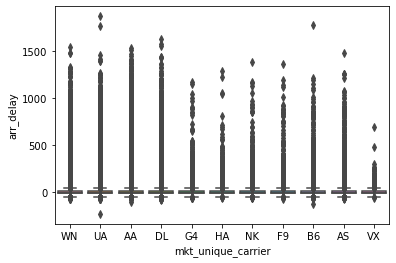

In [17]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x=train_n_null['mkt_unique_carrier'], y=y)
plt.show()

# Weather

In [18]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [19]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [20]:
connection = create_connection("data/weather_db.sqlite")

Connection to SQLite DB successful


In [21]:
select = "SELECT * from weather"
weather_list = execute_read_query(connection, select)

In [22]:
names = ['weather_id', 'IATA_code', 'date', 'min_temp', 'max_temp', 'avg_temp', 'total_snow_cm', 'windspeed_kmph', 'precipitation_mm', 'humidity', 'visibility', 'cloud_cover', 'heat_index_c', 'wind_chill_c', 'wind_gust_kmph', 'feels_like', 'weather_description', 'pressure']
weather = pd.DataFrame(weather_list, columns=names)

weather.insert(2, 'day', pd.to_datetime(weather['date']).dt.day)
weather.insert(2, 'month', pd.to_datetime(weather['date']).dt.month)
weather.insert(2, 'year', pd.to_datetime(weather['date']).dt.year)

weather = weather.drop(['weather_id', 'date'], axis=1)

In [23]:
# Get weather for origin
origin_names = ['origin', 'year', 'month', 'day','origin_min_temp', 'origin_max_temp', 'origin_avg_temp', 'origin_total_snow_cm', 'origin_windspeed_kmph', 'origin_precipitation_mm', 'origin_humidity', 'origin_visibility', 'origin_cloud_cover', 'origin_heat_index_c', 'origin_wind_chill_c', 'origin_wind_gust_kmph', 'origin_feels_like', 'origin_weather_description', 'origin_pressure']
weather_origin = weather.copy()
weather_origin.columns = origin_names

# Get weather for destination
dest_names = ['dest', 'year', 'month', 'day','dest_min_temp', 'dest_max_temp', 'dest_avg_temp', 'dest_total_snow_cm', 'dest_windspeed_kmph', 'dest_precipitation_mm', 'dest_humidity', 'dest_visibility', 'dest_cloud_cover', 'dest_heat_index_c', 'dest_wind_chill_c', 'dest_wind_gust_kmph', 'dest_feels_like', 'dest_weather_description', 'dest_pressure']
weather_dest = weather.copy()
weather_dest.columns = dest_names

In [24]:
# Merge weather data for origin airport
train_n_null = pd.merge(train_n_null, weather_origin, how='left', on=['origin', 'year', 'month', 'day',])

# Merge weather data for destination airport
train_n_null = pd.merge(train_n_null, weather_dest, how='left', on=['dest', 'year', 'month', 'day',])

In [25]:
total = train_n_null.isnull().sum().sort_values(ascending=False)
percent = (train_n_null.isnull().sum()/train_n_null.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
origin_wind_chill_c,40911,0.037446
origin_pressure,40911,0.037446
origin_min_temp,40911,0.037446
origin_max_temp,40911,0.037446
origin_avg_temp,40911,0.037446
origin_total_snow_cm,40911,0.037446
origin_windspeed_kmph,40911,0.037446
origin_precipitation_mm,40911,0.037446
origin_humidity,40911,0.037446
origin_visibility,40911,0.037446


In [26]:
train_n_null[train_n_null['origin_wind_chill_c'].isna()]['origin'].value_counts()[:30]

EVV    741
GJT    658
FAY    610
RST    592
HRL    588
TRI    583
LAN    564
DRO    563
STS    548
PHF    529
AZO    526
BLI    499
CWA    487
AEX    478
LNK    474
DAB    465
PAE    459
GRK    449
GTF    443
OAJ    440
ACY    434
DLH    434
BMI    432
STT    421
ITH    416
SGU    413
MLU    408
SWF    397
MBS    396
COU    395
Name: origin, dtype: int64

In [27]:
train_n_null[train_n_null['dest_wind_chill_c'].isna()]['dest'].value_counts()[:30]

EVV    728
GJT    666
FAY    628
TRI    565
HRL    557
LAN    554
STS    548
AZO    547
DRO    536
PHF    533
LNK    515
PAE    513
RST    505
BLI    483
DAB    468
COU    463
CWA    458
STT    447
AEX    446
GTF    444
SGU    443
GRK    436
ACY    429
OAJ    428
BMI    423
CMI    414
DLH    402
IDA    401
MLU    398
TTN    398
Name: dest, dtype: int64

In [28]:
missing_airports = train_n_null[train_n_null['origin_wind_chill_c'].isna()]['origin'].value_counts()[:50] + train_n_null[train_n_null['dest_wind_chill_c'].isna()]['dest'].value_counts()[:50]
missing_airports.sort_values(ascending=False)

EVV    1469.0
GJT    1324.0
FAY    1238.0
TRI    1148.0
HRL    1145.0
LAN    1118.0
DRO    1099.0
RST    1097.0
STS    1096.0
AZO    1073.0
PHF    1062.0
LNK     989.0
BLI     982.0
PAE     972.0
CWA     945.0
DAB     933.0
AEX     924.0
GTF     887.0
GRK     885.0
OAJ     868.0
STT     868.0
ACY     863.0
COU     858.0
SGU     856.0
BMI     855.0
DLH     836.0
MLU     806.0
ITH     790.0
IDA     789.0
MBS     788.0
SWF     785.0
CMI     776.0
TTN     773.0
BRO     761.0
ELM     754.0
MOT     753.0
LRD     747.0
SAF     746.0
MTJ     721.0
MLB     713.0
HLN     701.0
KTN     666.0
EWN     665.0
ERI     662.0
EGE     642.0
BQN     639.0
CPR     633.0
CLL     623.0
ABI       NaN
BFL       NaN
LSE       NaN
LYH       NaN
dtype: float64

In [29]:
train_n_null.to_csv('data/Training/combined_datasets/train.csv', index=False)

## Feature Scaling

In [ ]:
#train_cleaned, scaler = scale_encoder(train_n_null)

In [ ]:
#train_cleaned.head()

In [ ]:
#train_cleaned.to_csv('./data/train.csv', index=False)